<a href="https://colab.research.google.com/github/XTMay/python-data-science-course/blob/main/Lec_11_Introduction_to_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

def setup_chinese_font():
    """设置中文字体显示，适配不同操作系统"""
    system = platform.system()
    print(f"检测到操作系统: {system}")

    # 重建字体缓存（可选，首次运行时有用）
    try:
        fm._rebuild()
    except:
        pass

    if system == "Darwin":  # macOS
        # macOS 优先字体列表
        mac_fonts = [
            'PingFang SC',           # 苹方简体
            'Hiragino Sans GB',      # 冬青黑体简体中文
            'STHeiti',               # 华文黑体
            'Heiti SC',              # 黑体-简
            'Arial Unicode MS',      # Arial Unicode MS
            'SimHei'                 # 黑体（如果安装了）
        ]
        fonts_to_try = mac_fonts
    elif system == "Windows":
        fonts_to_try = ['SimHei', 'Microsoft YaHei', 'KaiTi', 'FangSong']
    else:  # Linux
        fonts_to_try = ['WenQuanYi Micro Hei', 'WenQuanYi Zen Hei', 'DejaVu Sans']

    # 获取系统可用字体
    available_fonts = [f.name for f in fm.fontManager.ttflist]
    print(f"系统中找到 {len(available_fonts)} 个字体")

    # 设置字体
    font_found = False
    for font_name in fonts_to_try:
        if font_name in available_fonts:
            plt.rcParams['font.sans-serif'] = [font_name] + ['DejaVu Sans']
            plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号
            print(f"成功设置字体: {font_name}")
            font_found = True
            break

    if not font_found:
        # 备选方案：搜索包含中文关键词的字体
        chinese_fonts = [f for f in available_fonts if any(keyword in f.lower()
                        for keyword in ['pingfang', 'hiragino', 'stheiti', 'heiti', 'han'])]
        if chinese_fonts:
            plt.rcParams['font.sans-serif'] = [chinese_fonts[0]] + ['DejaVu Sans']
            plt.rcParams['axes.unicode_minus'] = False
            print(f"使用备选中文字体: {chinese_fonts[0]}")
            font_found = True

    if not font_found:
        print("警告: 未找到合适的中文字体，中文可能显示为方块")
        plt.rcParams['axes.unicode_minus'] = False

    # 显示当前字体设置
    print(f"当前字体设置: {plt.rcParams['font.sans-serif'][:2]}")
    return font_found

# 执行字体设置
setup_chinese_font()
print("中文字体配置完成!")

检测到操作系统: Darwin
系统中找到 464 个字体
成功设置字体: Hiragino Sans GB
当前字体设置: ['Hiragino Sans GB', 'DejaVu Sans']
中文字体配置完成!


# Seaborn 教学演示 - Tips 数据集

## 简介

[Seaborn](https://seaborn.pydata.org/) 是一个基于 Matplotlib 的 Python 可视化库，它提供了更高级的接口和更美观的默认样式，使得统计图形的绘制更加方便和直观。

`tips` 数据集是 Seaborn 内置的一个示例数据集，它记录了餐厅服务员收到的小费信息，包含以下几列：

- `total_bill`: 总账单金额
- `tip`: 小费金额
- `sex`: 付款人的性别 (Male/Female)
- `smoker`: 付款人是否吸烟 (Yes/No)
- `day`: 就餐的星期几 (Thur/Fri/Sat/Sun)
- `time`: 就餐时间 (Lunch/Dinner)
- `size`: 就餐人数

我们将使用这个数据集来演示 Seaborn 的基本用法。

## 教学内容

### 1. 导入库和加载数据

首先，我们需要导入必要的库：`seaborn` 用于可视化，`matplotlib.pyplot` 用于显示图表，`pandas` 用于数据处理。然后，使用 `seaborn.load_dataset()` 函数加载 `tips` 数据集。

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

tips = sns.load_dataset("tips")

In [ ]:
# 删除原有的简单字体设置，现在使用上面的完整字体设置函数

In [ ]:
# 预览数据前5行
print("数据前5行:")
print(tips.head())

# 查看数据类型和非空值
print("\n数据信息:")
tips.info()

# 查看数值列的基本统计描述
print("\n数值列统计描述:")
print(tips.describe())

# 查看非数值列的频数统计
print("\n非数值列频数统计:")
for col in ['sex', 'smoker', 'day', 'time']:
    print(f"\n{col}:")
    print(tips[col].value_counts())

数据前5行:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

数据信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB

数值列统计描述:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.


不同性别的人数分布:


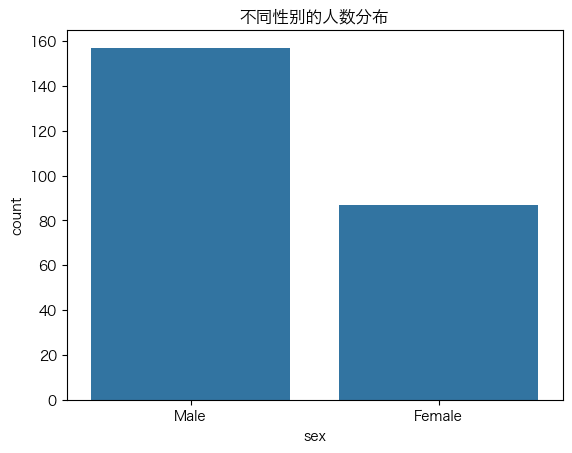


不同星期几的就餐次数分布:


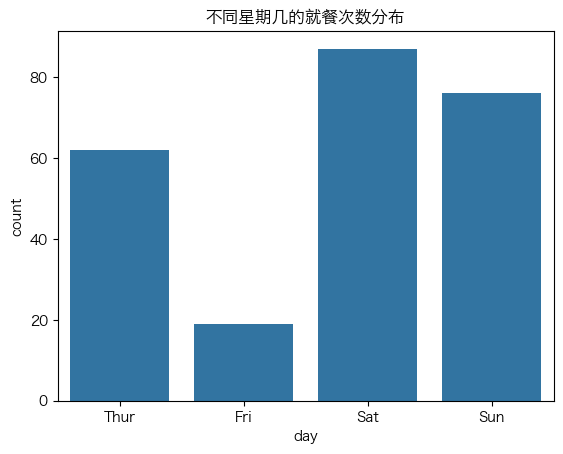

In [ ]:
# 不同性别的人数分布
print("\n不同性别的人数分布:")
sns.countplot(data=tips, x="sex")
plt.title("不同性别的人数分布")
plt.show()

# 不同星期几的就餐次数分布
print("\n不同星期几的就餐次数分布:")
sns.countplot(data=tips, x="day", order=['Thur', 'Fri', 'Sat', 'Sun'])
plt.title("不同星期几的就餐次数分布")
plt.show()


总账单金额的分布:


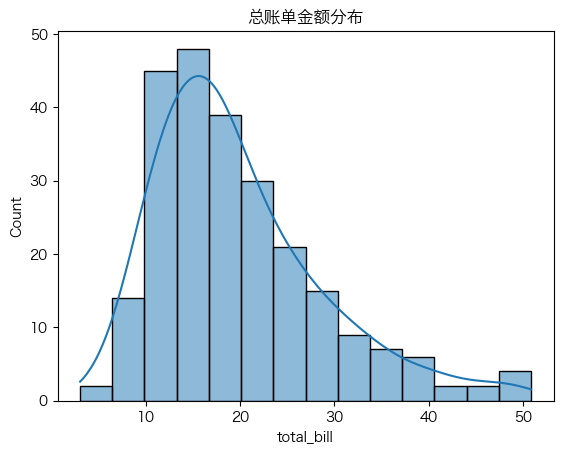


小费金额的分布:


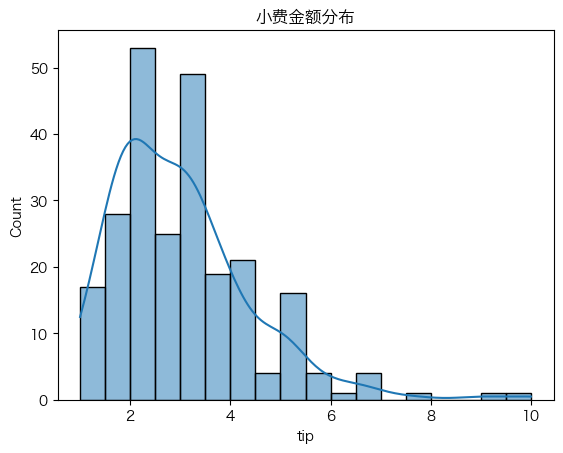

In [ ]:
# 总账单金额的分布
print("\n总账单金额的分布:")
sns.histplot(data=tips, x="total_bill", kde=True)
plt.title("总账单金额分布")
plt.show()

# 小费金额的分布
print("\n小费金额的分布:")
sns.histplot(data=tips, x="tip", kde=True)
plt.title("小费金额分布")
plt.show()


不同星期几的总账单金额分布:


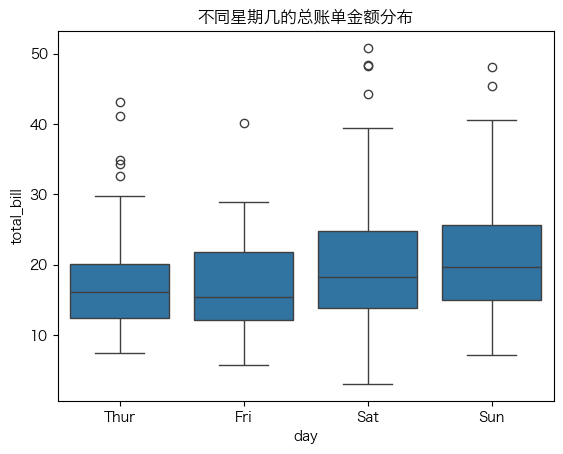


不同就餐时间的小费金额分布:


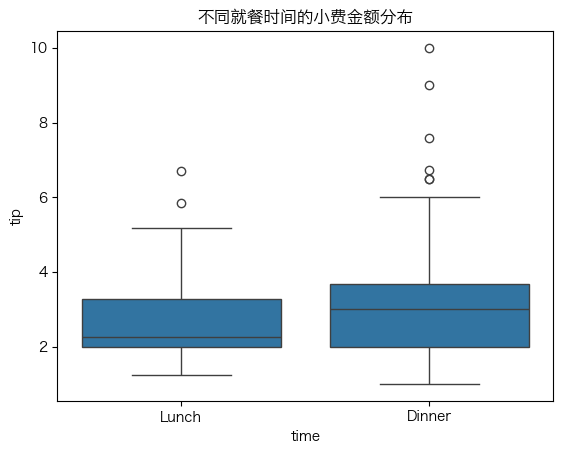

In [ ]:
# 不同星期几的总账单金额分布
print("\n不同星期几的总账单金额分布:")
sns.boxplot(data=tips, x="day", y="total_bill", order=['Thur', 'Fri', 'Sat', 'Sun'])
plt.title("不同星期几的总账单金额分布")
plt.show()

# 不同就餐时间的小费金额分布
print("\n不同就餐时间的小费金额分布:")
sns.boxplot(data=tips, x="time", y="tip")
plt.title("不同就餐时间的小费金额分布")
plt.show()


总账单金额和小费金额之间的关系:


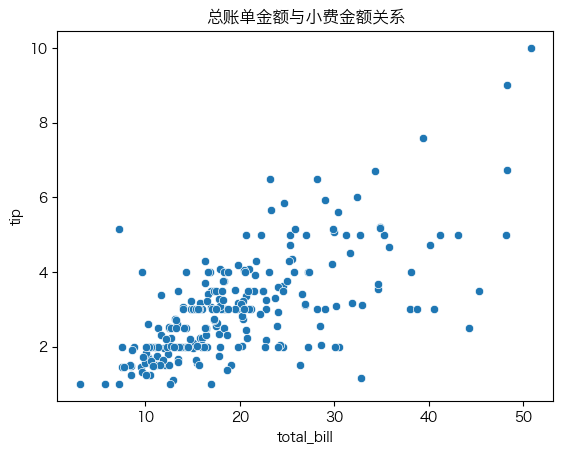

In [ ]:
# 总账单金额和小费金额之间的关系
print("\n总账单金额和小费金额之间的关系:")
sns.scatterplot(data=tips, x="total_bill", y="tip")
plt.title("总账单金额与小费金额关系")
plt.show()


总账单金额与小费金额的回归关系:


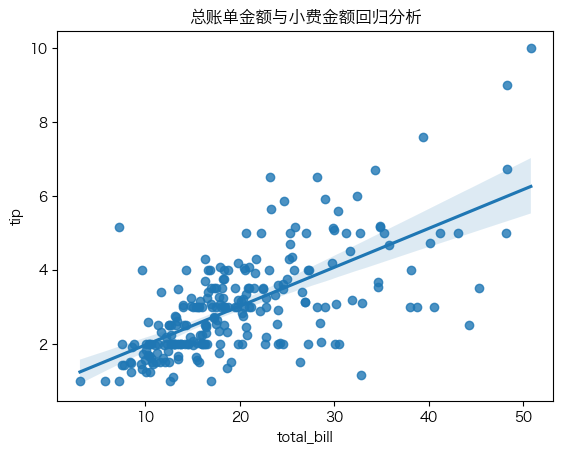

In [ ]:
# 总账单金额和小费金额的回归关系
print("\n总账单金额与小费金额的回归关系:")
sns.regplot(data=tips, x="total_bill", y="tip") # regression
plt.title("总账单金额与小费金额回归分析")
plt.show()


不同性别在不同星期几的总账单金额分布差异:


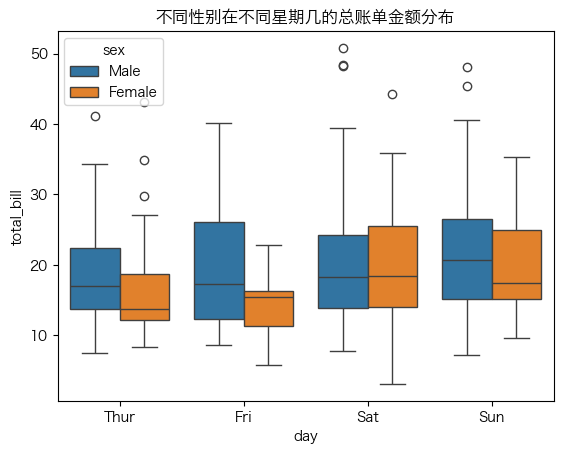


吸烟者和非吸烟者在不同就餐时间的小费金额分布差异:


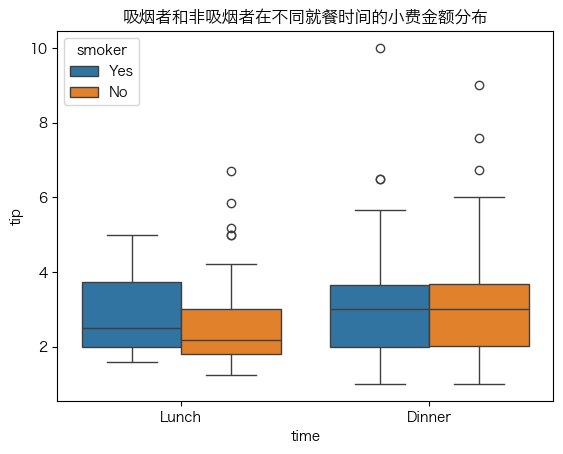

In [ ]:
# 不同性别在不同星期几的总账单金额分布差异
print("\n不同性别在不同星期几的总账单金额分布差异:")
sns.boxplot(data=tips, x="day", y="total_bill", hue="sex", order=['Thur', 'Fri', 'Sat', 'Sun'])
plt.title("不同性别在不同星期几的总账单金额分布")
plt.show()

# 吸烟者和非吸烟者在不同就餐时间的小费金额分布差异
print("\n吸烟者和非吸烟者在不同就餐时间的小费金额分布差异:")
sns.boxplot(data=tips, x="time", y="tip", hue="smoker")
plt.title("吸烟者和非吸烟者在不同就餐时间的小费金额分布")
plt.show()


按性别计算平均小费:
      sex       tip
0    Male  3.089618
1  Female  2.833448

绘制按性别平均小费的柱状图:


/var/folders/48/zcq5ydb90d53q6sd6g4zy7f00000gn/T/ipykernel_23439/924635205.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_by_sex = tips.groupby('sex')['tip'].mean().reset_index()


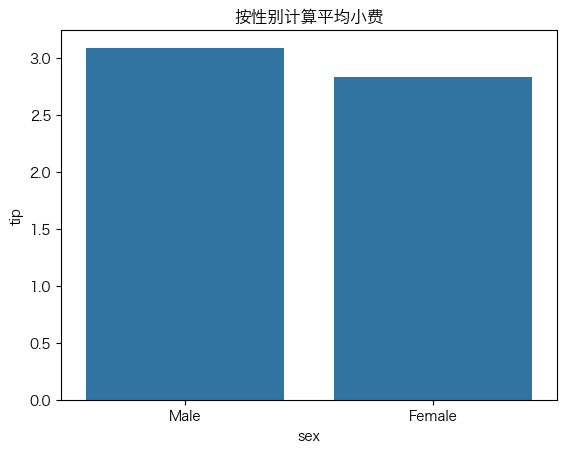

In [ ]:
# 按性别计算平均小费
print("\n按性别计算平均小费:")
avg_tip_by_sex = tips.groupby('sex')['tip'].mean().reset_index()
print(avg_tip_by_sex)

# 绘制按性别平均小费的柱状图
print("\n绘制按性别平均小费的柱状图:")
sns.barplot(data=avg_tip_by_sex, x="sex", y="tip")
plt.title("按性别计算平均小费")
plt.show()


按星期几和时间计算平均总账单:
    day    time  total_bill
0  Thur   Lunch   17.664754
1  Thur  Dinner   18.780000
2   Fri   Lunch   12.845714
3   Fri  Dinner   19.663333
4   Sat   Lunch         NaN
5   Sat  Dinner   20.441379
6   Sun   Lunch         NaN
7   Sun  Dinner   21.410000

绘制按星期几和时间平均总账单的柱状图:


/var/folders/48/zcq5ydb90d53q6sd6g4zy7f00000gn/T/ipykernel_23439/1000834484.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_total_bill_by_day_time = tips.groupby(['day', 'time'])['total_bill'].mean().reset_index()


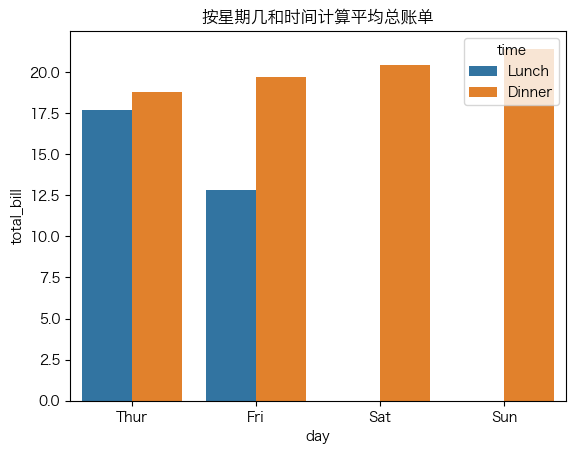

In [ ]:
# 按星期几和时间计算平均总账单
print("\n按星期几和时间计算平均总账单:")
avg_total_bill_by_day_time['avg_total_bill'] = tips.groupby(['day', 'time'])['total_bill'].mean().reset_index()
print(avg_total_bill_by_day_time)

# 绘制按星期几和时间平均总账单的柱状图
print("\n绘制按星期几和时间平均总账单的柱状图:")
sns.barplot(data=avg_total_bill_by_day_time, x="day", y="total_bill", hue="time", order=['Thur', 'Fri', 'Sat', 'Sun'])
plt.title("按星期几和时间计算平均总账单")
plt.show()


按性别和吸烟情况绘制小费比例的箱线图:


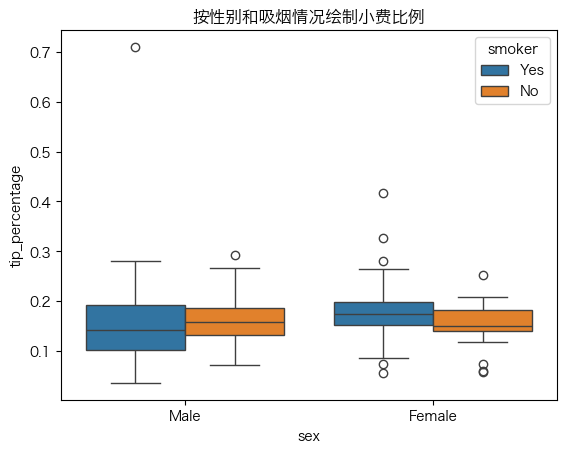

In [ ]:
# 计算小费比例
tips['tip_percentage'] = tips['tip'] / tips['total_bill']

# 按性别和吸烟情况绘制小费比例的箱线图
print("\n按性别和吸烟情况绘制小费比例的箱线图:")
sns.boxplot(data=tips, x="sex", y="tip_percentage", hue="smoker")
plt.title("按性别和吸烟情况绘制小费比例")
plt.show()

# Seaborn 教学演示 - Iris 数据集

## 简介

[Seaborn](https://seaborn.pydata.org/) 是一个强大的 Python 数据可视化库，它建立在 Matplotlib 的基础上，提供了更美观的默认样式和更高级的统计图表功能。

`iris` 数据集是一个经典的分类数据集，常用于机器学习和统计分析的示例。它记录了三种不同鸢尾花的测量数据，包含以下几列：

- `sepal_length`: 花萼长度
- `sepal_width`: 花萼宽度
- `petal_length`: 花瓣长度
- `petal_width`: 花瓣宽度
- `species`: 鸢尾花种类 (setosa, versicolor, virginica)

我们将使用这个数据集来演示 Seaborn 在分类数据可视化方面的应用。

## 教学内容

### 1. 导入库和加载数据

首先，导入必要的库：`seaborn` 用于可视化，`matplotlib.pyplot` 用于显示图表，`pandas` 用于数据处理。然后，使用 `seaborn.load_dataset()` 函数加载 `iris` 数据集。

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

iris = sns.load_dataset("iris")

### 2. 数据预览和基本统计描述

在进行可视化之前，我们先对数据进行初步的了解，包括查看前几行数据、数据类型、非空值以及数值列的基本统计信息。

In [ ]:
# 预览数据前5行
print("数据前5行:")
print(iris.head()) # tail()

# 查看数据信息
print("\n数据信息:")
iris.info()

# 查看数值列统计描述
print("\n数值列统计描述:")
print(iris.describe())

# 查看花种类分布
print("\n花种类分布:")
print(iris['species'].value_counts()) # value_counts

数据前5行:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

数据信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

数值列统计描述:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.84

### 3. 单变量分析

我们先对各个特征进行单变量分析，了解它们的分布情况。

#### 直方图和密度图

使用 `histplot` 和 `kdeplot` 可以绘制单个数值变量的分布。


花萼长度分布:


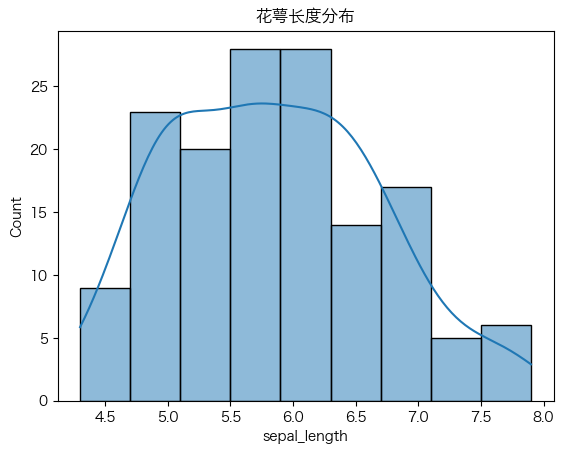


花瓣宽度分布:


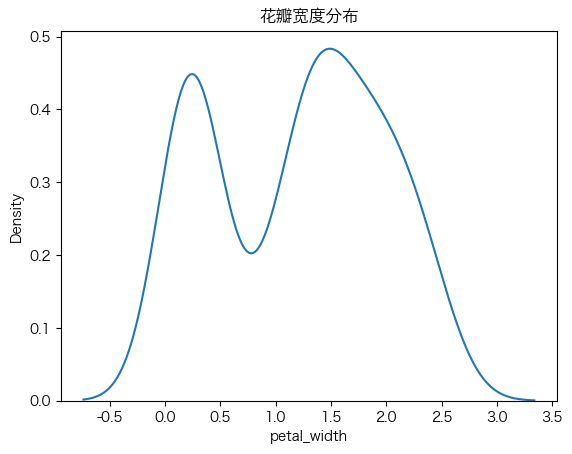

In [ ]:
# 花萼长度分布
print("\n花萼长度分布:")
sns.histplot(data=iris, x="sepal_length", kde=True)
plt.title("花萼长度分布")
plt.show()

# 花瓣宽度分布
print("\n花瓣宽度分布:")
sns.kdeplot(data=iris, x="petal_width")
plt.title("花瓣宽度分布")
plt.show()

#### 箱线图

箱线图 (`boxplot`) 可以展示数据的分布、中位数、四分位数、异常值等信息。


花萼宽度箱线图:


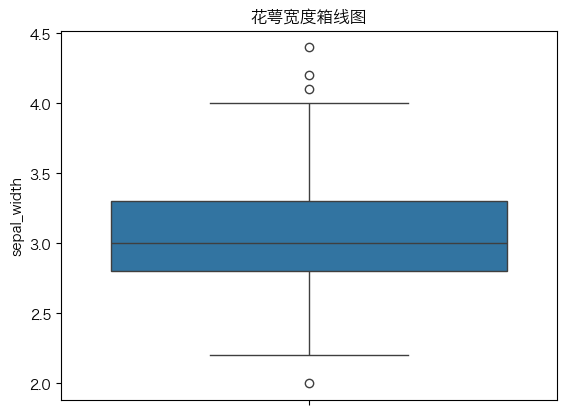

In [ ]:
# 花萼宽度箱线图
print("\n花萼宽度箱线图:")
sns.boxplot(data=iris, y="sepal_width")
plt.title("花萼宽度箱线图")
plt.show()

### 4. 双变量分析

接下来，我们分析不同特征之间的关系。

#### 散点图

散点图 (`scatterplot`) 可以展示两个数值变量之间的关系。


花萼长度与花萼宽度关系:


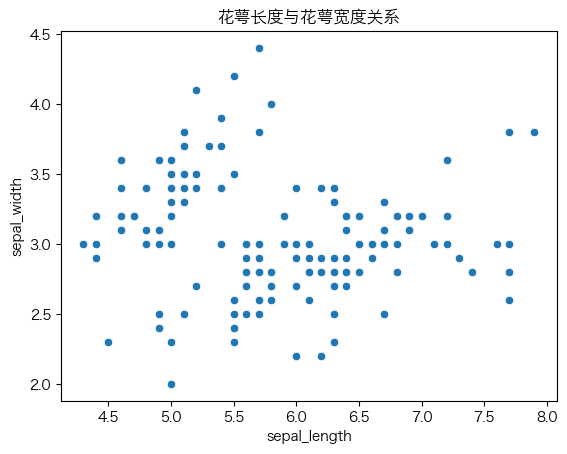

In [ ]:
# 花萼长度与花萼宽度关系
print("\n花萼长度与花萼宽度关系:")
sns.scatterplot(data=iris, x="sepal_length", y="sepal_width")
plt.title("花萼长度与花萼宽度关系")
plt.show()

#### 成对图 (Pairplot)

成对图 (`pairplot`) 可以一次性绘制数据集中所有数值变量之间的散点图，并在对角线上绘制单变量分布图。通过设置 `hue` 参数，可以按类别对数据进行分组可视化。


所有特征之间的成对图，按花种类区分:


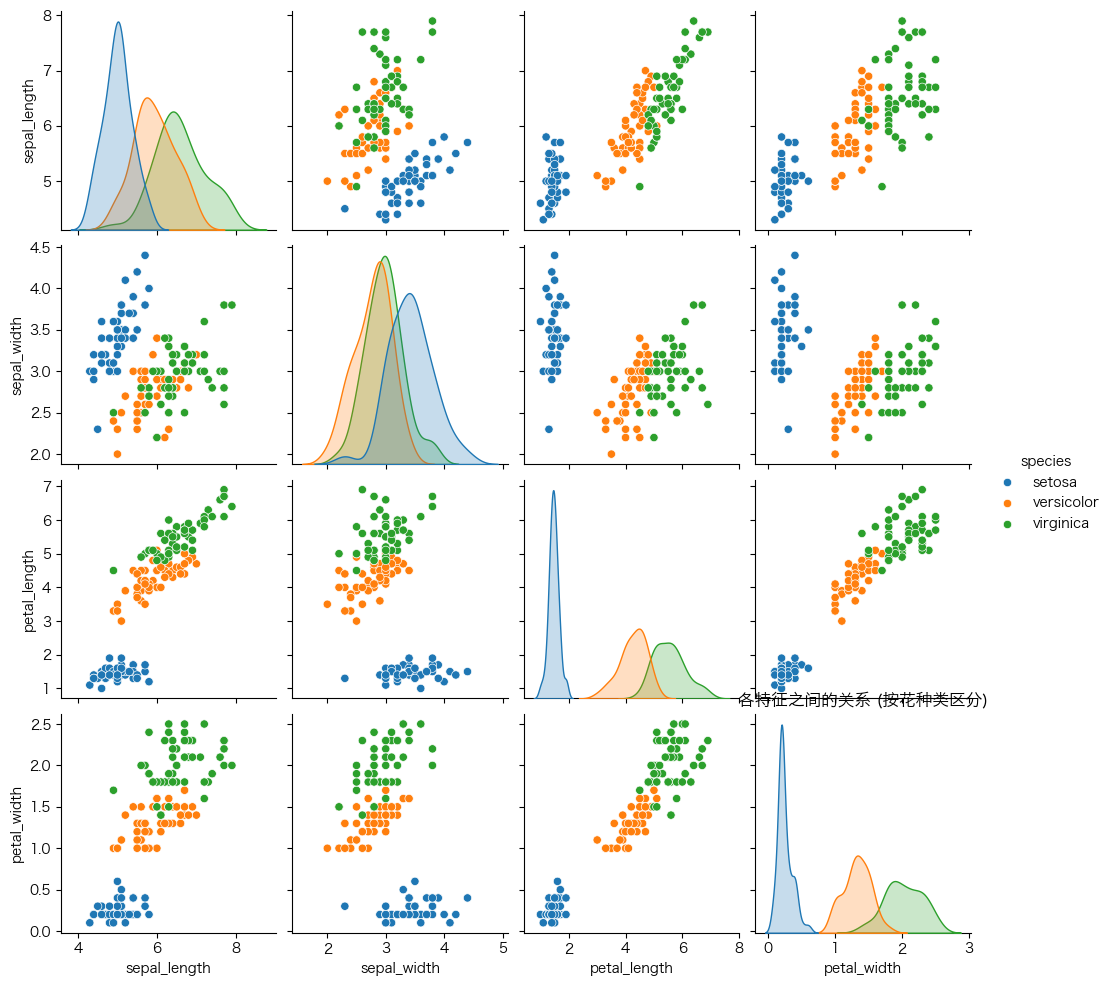

In [ ]:
# 所有特征之间的成对图，按花种类区分
print("\n所有特征之间的成对图，按花种类区分:")
sns.pairplot(iris, hue="species")
plt.title("各特征之间的关系 (按花种类区分)")
plt.show()

成对图可以直观地观察不同鸢尾花品种在各个特征维度上的分布和关系。

#### 回归图

回归图 (`regplot`) 可以绘制两个数值变量之间的散点图，并拟合一条回归直线，展示它们之间的线性关系。


花瓣长度与花瓣宽度回归关系:


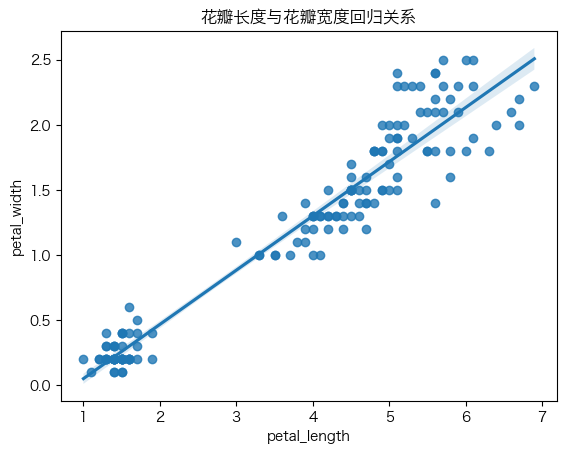

In [ ]:
# 花瓣长度与花瓣宽度回归关系
print("\n花瓣长度与花瓣宽度回归关系:")
sns.regplot(data=iris, x="petal_length", y="petal_width")
plt.title("花瓣长度与花瓣宽度回归关系")
plt.show()

### 5. 分类可视化

Seaborn 提供了方便的函数来对分类数据进行可视化。

#### 按品种绘制箱线图

我们可以按花种类 (`species`) 绘制每个数值特征的箱线图，比较不同品种在这些特征上的分布差异。


按花种类绘制花萼长度箱线图:


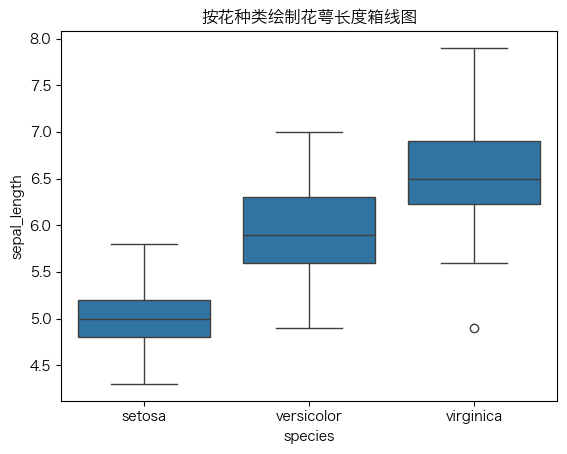


按花种类绘制花瓣宽度箱线图:


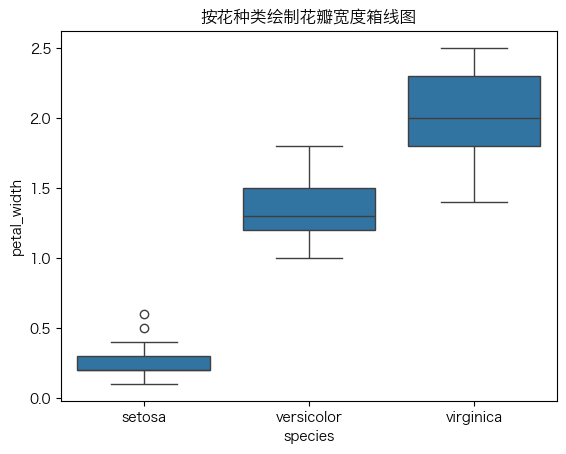

In [ ]:
# 按花种类绘制花萼长度箱线图
print("\n按花种类绘制花萼长度箱线图:")
sns.boxplot(data=iris, x="species", y="sepal_length")
plt.title("按花种类绘制花萼长度箱线图")
plt.show()

# 按花种类绘制花瓣宽度箱线图
print("\n按花种类绘制花瓣宽度箱线图:")
sns.boxplot(data=iris, x="species", y="petal_width")
plt.title("按花种类绘制花瓣宽度箱线图")
plt.show()

#### 按品种绘制散点图

在散点图中，我们也可以使用颜色 (`hue`) 或样式 (`style`) 来区分不同的花种类，从而观察它们在二维平面上的分布。


花萼长度与花萼宽度散点图，按花种类区分:


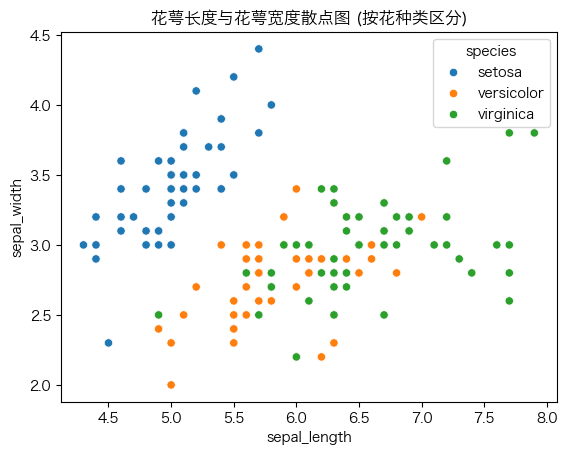

In [ ]:
# 花萼长度与花萼宽度散点图，按花种类区分
print("\n花萼长度与花萼宽度散点图，按花种类区分:")
sns.scatterplot(data=iris, x="sepal_length", y="sepal_width", hue="species")
plt.title("花萼长度与花萼宽度散点图 (按花种类区分)")
plt.show()

## 总结

通过 Seaborn 的可视化功能，我们可以方便地对 Iris 数据集进行探索性数据分析。单变量分析帮助我们了解各个特征的分布，双变量分析揭示了特征之间的关系，而分类可视化则直观地展示了不同鸢尾花品种在形态特征上的差异。特别是成对图和按类别绘制的箱线图和散点图，能够有效地帮助我们区分不同的花种类，为后续的建模分析提供重要的洞察。